In [7]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt

from neural_net import NeuralNetwork
from operations import *

In [2]:
def load_dataset(csv_path, target_feature):
    dataset = pd.read_csv(csv_path)
    t = np.expand_dims(dataset[target_feature].to_numpy().astype(float), axis=1)
    X = dataset.drop([target_feature], axis=1).to_numpy()
    return X, t

In [3]:
X, y = load_dataset("wine_quality.csv", "quality")

n_features = X.shape[1]
epochs = 500

indices = np.arange(X.shape[0])
np.random.shuffle(indices)
num_folds = 5
fold_size = len(indices) // num_folds
folds = []
for i in range(num_folds):
    start = i * fold_size
    end = (i + 1) * fold_size if i < num_folds - 1 else None
    fold_indices = np.array(indices[start:end])
    folds.append(fold_indices)

tot_epoch_losses = []
mae = []
for i in range(num_folds):
    X_train = np.delete(X, folds[i], axis=0)
    X_test = X[folds[i]]
    y_train = np.delete(y, folds[i], axis=0)
    y_test = y[folds[i]]

    net = NeuralNetwork(n_features, [32,32,16,1], [ReLU(), ReLU(), Sigmoid(), Identity()], MeanSquaredError(), learning_rate=0.001)
    trained_W, epoch_losses = net.train(X_train, y_train, epochs)
    if (i == 0):
        tot_epoch_losses = epoch_losses
    else:
        for j in range(epochs):
            tot_epoch_losses[j] += epoch_losses[j]
    mae_i = net.evaluate(X_test, y_test, mean_absolute_error)
    mae.append(mae_i)
    print("Error on test set: {}".format(mae_i))

for i in range(epochs):
    tot_epoch_losses[i] = tot_epoch_losses[i] / num_folds

Error on test set: 0.6941695018618161
Error on test set: 0.6777510106800867
Error on test set: 0.6593701530287462
Error on test set: 0.6689391076647284
Error on test set: 0.721445111960001


In [6]:
mae = np.array(mae)
print("MAE across all folds: ", mae)
print("Average MAE: ", np.mean(mae))
print("Standard deviation of MAEs: ", np.std(mae))

MAE across all folds:  [0.6941695  0.67775101 0.65937015 0.66893911 0.72144511]
Average MAE:  0.6843349770390756
Standard deviation of MAEs:  0.02180598008351547


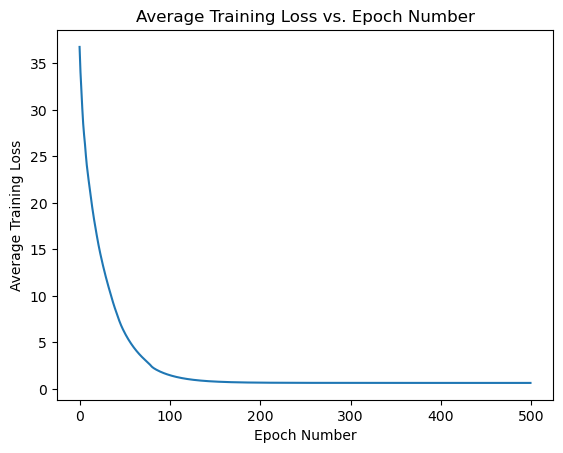

In [8]:
plt.plot(np.arange(0, epochs), tot_epoch_losses)
plt.title('Average Training Loss vs. Epoch Number')
plt.xlabel('Epoch Number')
plt.ylabel('Average Training Loss')
plt.show()